CNN model with parameters refering from VGG
The input data are preprocessed grayscale images(one channel for every pixel.)

The parameters refer to the Pretrained CNN models, whose imput data are with 3 channels in every pixel.

In [1]:
import numpy as np
import tensorflow as tf
print(tf.__version__)
print(tf.keras.__version__)
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

# Use TensorFlow's Keras API
# Example of using Keras API directly from TensorFlow
# keras_layers = tf.keras.layers
# keras_utils = tf.keras.utils
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical


2023-12-04 16:05:59.686944: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2023-12-04 16:06:00.263396: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer.so.7'; dlerror: libnvinfer.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhangze6/Research/cudnn-11.2-linux-x64-v8.1.1.33/cuda/lib64:/usr/local/cuda-11.2/lib64
2023-12-04 16:06:00.263440: W tensorflow/compiler/xla/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libnvinfer_plugin.so.7'; dlerror: libnvinfer_plugin.so.7: cannot open shared object file: No such file or directory; LD_LIBRARY_PATH: /home/zhangze6/Research/cudnn-11.2-li

2.11.0
2.11.0


In [2]:
images_data = np.load("../images_CNN.npz")
images = images_data['arr_0']
print(images.shape)
labels_data = np.load("../labels_CNN.npz")
labels = labels_data['arr_0']
print(labels.shape)

(1728, 256, 256)
(1728,)


In [3]:
unique_labels, counts = np.unique(labels, return_counts=True)
unique_labels

array(['Cas', 'Gem', 'Ori', 'Per', 'ST', 'UM'], dtype='<U3')

In [4]:
label_mapping = {'Cas': 0, 'Gem': 1, 'Ori': 2, 'Per': 3, 'ST': 4, 'UM': 5}
labels_mapped = [label_mapping[label] for label in labels]
labels_encoded = to_categorical(labels_mapped, num_classes=6)
labels_encoded

array([[0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       [0., 0., 1., 0., 0., 0.],
       ...,
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.],
       [0., 0., 0., 0., 1., 0.]], dtype=float32)

In [5]:
images = images/255
images.max()

1.0

In [6]:
x_train, x_test, y_train, y_test = train_test_split(images, labels_encoded, test_size=0.2, random_state=42, stratify=labels_encoded)
print(x_train.shape)
print(y_train.shape)

(1382, 256, 256)
(1382, 6)


Original VGG11

In [7]:
def channel1_VGG_11(input_shape, num_classes):
  model = keras.Sequential()
  # Block 1
  model.add(layers.Conv2D(64, (3, 3),activation='relu', padding='same', input_shape=(256, 256, 1)))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

  # Block 2
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(layers.Flatten())
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  model.add(layers.Dense(4096, activation='relu'))
  model.add(layers.Dropout(0.5))
  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

model11_original = channel1_VGG_11(input_shape=(256, 256, 1), num_classes=6)

model11_original.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 64)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 128)      0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 64, 64, 256)       295168    
                                                                 
 conv2d_3 (Conv2D)           (None, 64, 64, 256)       5

2023-12-04 16:06:23.841516: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 16:06:23.845400: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 16:06:23.845722: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-12-04 16:06:23.846269: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

In [8]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

f1_scores = []
for iter in range(10):
  model11_original = channel1_VGG_11(input_shape=(256, 256, 1), num_classes=6)
  model11_original.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model11_original.fit(x_train, y_train, epochs=20, batch_size=32)

  predicted_model11_original_prob = model11_original.predict(x_test)
  predicted_model11_original_labels = np.argmax(predicted_model11_original_prob, axis=1)

  # Calculate F1 score and append to the list
  f1 = f1_score(np.argmax(y_test, axis=1), predicted_model11_original_labels, average='macro')  # Change average as needed
  f1_scores.append(f1)

  # Optional: Print F1 score for each iteration
  print(f"Iteration {iter+1}: F1 Score = {f1}")

# After all iterations, you can print or analyze all F1 scores
print(f"All F1 Scores: {f1_scores}")

Epoch 1/20


2023-12-04 16:06:51.224209: I tensorflow/compiler/xla/stream_executor/cuda/cuda_dnn.cc:428] Loaded cuDNN version 8101
2023-12-04 16:06:53.606842: I tensorflow/compiler/xla/stream_executor/cuda/cuda_blas.cc:630] TensorFloat-32 will be used for the matrix multiplication. This will only be logged once.
2023-12-04 16:06:53.610769: I tensorflow/compiler/xla/service/service.cc:173] XLA service 0x7fc97e062350 initialized for platform CUDA (this does not guarantee that XLA will be used). Devices:
2023-12-04 16:06:53.610785: I tensorflow/compiler/xla/service/service.cc:181]   StreamExecutor device (0): NVIDIA GeForce RTX 3080 Ti, Compute Capability 8.6
2023-12-04 16:06:53.614658: I tensorflow/compiler/mlir/tensorflow/utils/dump_mlir_util.cc:268] disabling MLIR crash reproducer, set env var `MLIR_CRASH_REPRODUCER_DIRECTORY` to enable.
2023-12-04 16:06:53.708850: I tensorflow/compiler/jit/xla_compilation_cache.cc:477] Compiled cluster using XLA!  This line is logged at most once for the lifetime 

44/44 [==============================] - 10s 79ms/step - loss: 1.8002 - accuracy: 0.1693
Epoch 2/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7941 - accuracy: 0.1527
Epoch 3/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7939 - accuracy: 0.1679
Epoch 4/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7931 - accuracy: 0.1389
Epoch 5/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7928 - accuracy: 0.1628
Epoch 6/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7927 - accuracy: 0.1491
Epoch 7/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7926 - accuracy: 0.1397
Epoch 8/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7926 - accuracy: 0.1635
Epoch 9/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7930 - accuracy: 0.1592
Epoch 10/20
44/44 [==============================] - 3s 66ms/step - loss: 1.7924 - accuracy: 0.1534
Epoch 11/20
44/44 [

2023-12-04 16:11:13.568308: W tensorflow/tsl/framework/bfc_allocator.cc:479] Allocator (GPU_0_bfc) ran out of memory trying to allocate 512.00MiB (rounded to 536870912)requested by op gradient_tape/sequential_5/dense_15/MatMul/MatMul_1
If the cause is memory fragmentation maybe the environment variable 'TF_GPU_ALLOCATOR=cuda_malloc_async' will improve the situation. 
Current allocation summary follows.
Current allocation summary follows.
2023-12-04 16:11:13.568340: I tensorflow/tsl/framework/bfc_allocator.cc:1034] BFCAllocator dump for GPU_0_bfc
2023-12-04 16:11:13.568354: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (256): 	Total Chunks: 90, Chunks in use: 88. 22.5KiB allocated for chunks. 22.0KiB in use in bin. 2.8KiB client-requested in use in bin.
2023-12-04 16:11:13.568362: I tensorflow/tsl/framework/bfc_allocator.cc:1041] Bin (512): 	Total Chunks: 10, Chunks in use: 9. 5.2KiB allocated for chunks. 4.8KiB in use in bin. 4.5KiB client-requested in use in bin.
2023-12-04 16

ResourceExhaustedError: Graph execution error:

Detected at node 'gradient_tape/sequential_5/dense_15/MatMul/MatMul_1' defined at (most recent call last):
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/runpy.py", line 193, in _run_module_as_main
      "__main__", mod_spec)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/runpy.py", line 85, in _run_code
      exec(code, run_globals)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel_launcher.py", line 16, in <module>
      app.launch_new_instance()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/traitlets/config/application.py", line 846, in launch_instance
      app.start()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/kernelapp.py", line 677, in start
      self.io_loop.start()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/tornado/platform/asyncio.py", line 199, in start
      self.asyncio_loop.run_forever()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/asyncio/base_events.py", line 541, in run_forever
      self._run_once()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/asyncio/base_events.py", line 1786, in _run_once
      handle._run()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/asyncio/events.py", line 88, in _run
      self._context.run(self._callback, *self._args)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 457, in dispatch_queue
      await self.process_one()
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 446, in process_one
      await dispatch(*args)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 353, in dispatch_shell
      await result
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/kernelbase.py", line 648, in execute_request
      reply_content = await reply_content
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/ipkernel.py", line 353, in do_execute
      res = shell.run_cell(code, store_history=store_history, silent=silent)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/ipykernel/zmqshell.py", line 533, in run_cell
      return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2902, in run_cell
      raw_cell, store_history, silent, shell_futures)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 2947, in _run_cell
      return runner(coro)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/async_helpers.py", line 68, in _pseudo_sync_runner
      coro.send(None)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3173, in run_cell_async
      interactivity=interactivity, compiler=compiler, result=result)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3364, in run_ast_nodes
      if (await self.run_code(code, result,  async_=asy)):
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/IPython/core/interactiveshell.py", line 3444, in run_code
      exec(code_obj, self.user_global_ns, self.user_ns)
    File "/tmp/ipykernel_2522395/644784175.py", line 7, in <module>
      model11_original.fit(x_train, y_train, epochs=20, batch_size=32)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/utils/traceback_utils.py", line 65, in error_handler
      return fn(*args, **kwargs)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/engine/training.py", line 1650, in fit
      tmp_logs = self.train_function(iterator)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/engine/training.py", line 1249, in train_function
      return step_function(self, iterator)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/engine/training.py", line 1233, in step_function
      outputs = model.distribute_strategy.run(run_step, args=(data,))
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/engine/training.py", line 1222, in run_step
      outputs = model.train_step(data)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/engine/training.py", line 1027, in train_step
      self.optimizer.minimize(loss, self.trainable_variables, tape=tape)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 526, in minimize
      grads_and_vars = self.compute_gradients(loss, var_list, tape)
    File "/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/keras/optimizers/optimizer_experimental/optimizer.py", line 259, in compute_gradients
      grads = tape.gradient(loss, var_list)
Node: 'gradient_tape/sequential_5/dense_15/MatMul/MatMul_1'
OOM when allocating tensor with shape[32768,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc
	 [[{{node gradient_tape/sequential_5/dense_15/MatMul/MatMul_1}}]]
Hint: If you want to see a list of allocated tensors when OOM happens, add report_tensor_allocations_upon_oom to RunOptions for current allocation info. This isn't available when running in Eager mode.
 [Op:__inference_train_function_29551]

In [9]:
# Assuming f1_scores is your list of F1 scores
f1_mean = np.mean(f1_scores)
f1_std = np.std(f1_scores)

print(f"Mean F1 Score: {f1_mean}")
print(f"Standard Deviation of F1 Scores: {f1_std}")

Mean F1 Score: 0.04732349785847071
Standard Deviation of F1 Scores: 0.00030673905046865583


11/11 [==============================] - 1s 138ms/step


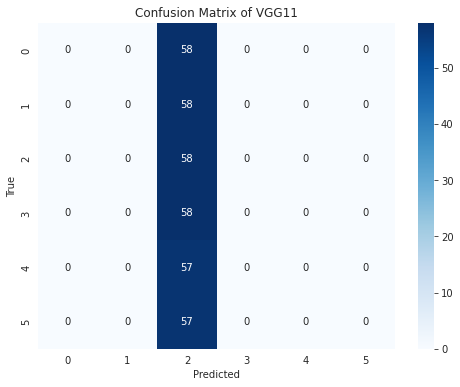

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        58
           2       0.17      1.00      0.29        58
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        57
           5       0.00      0.00      0.00        57

    accuracy                           0.17       346
   macro avg       0.03      0.17      0.05       346
weighted avg       0.03      0.17      0.05       346


/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [9]:
predicted_test_prob11 = model11_original.predict(x_test)
predicted_test_labels11 = np.argmax(predicted_test_prob11, axis=1)

cm11 = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels11)
plt.figure(figsize=(8, 6))
sns.heatmap(cm11, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of VGG11 original')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels11))

Remove the FCLs

In [15]:
def channel1_VGG_11(input_shape, num_classes):
  model = keras.Sequential()
  # Block 1
  model.add(layers.Conv2D(64, (3, 3),activation='relu', padding='same', input_shape=(256, 256, 1)))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

  # Block 2
  model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
  model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

  model.add(layers.Flatten())
  # model.add(layers.Dense(4096, activation='relu'))
  # model.add(layers.Dropout(0.5))
  # model.add(layers.Dense(4096, activation='relu'))
  # model.add(layers.Dropout(0.5))
  # Output Layer
  model.add(layers.Dense(num_classes, activation='softmax'))

  return model

model11 = channel1_VGG_11(input_shape=(256, 256, 1), num_classes=6)

model11.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_40 (Conv2D)          (None, 256, 256, 64)      640       
                                                                 
 max_pooling2d_25 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_41 (Conv2D)          (None, 128, 128, 128)     73856     
                                                                 
 max_pooling2d_26 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                            
                                                                 
 conv2d_42 (Conv2D)          (None, 64, 64, 256)       295168    
                                                                 
 conv2d_43 (Conv2D)          (None, 64, 64, 256)      

In [16]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

f1_scores11 = []
for iter in range(10):
    model11 = channel1_VGG_11(input_shape=(256, 256, 1), num_classes=6)
    model11.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    model11.fit(x_train, y_train, epochs=20, batch_size=32)

    predicted_test_prob11 = model11.predict(x_test)
    predicted_test_labels11 = np.argmax(predicted_test_prob11, axis=1)

    # Calculate F1 score and append to the list
    f1 = f1_score(np.argmax(y_test, axis=1), predicted_test_labels11, average='macro')  # Change average as needed
    f1_scores11.append(f1)

    # Optional: Print F1 score for each iteration
    print(f"Iteration {iter+1}: F1 Score = {f1}")

# After all iterations, you can print or analyze all F1 scores
print(f"All F1 Scores: {f1_scores11}")

Epoch 1/20
44/44 [==============================] - 4s 59ms/step - loss: 1.7936 - accuracy: 0.1512
Epoch 2/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7919 - accuracy: 0.1592
Epoch 3/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7918 - accuracy: 0.1556
Epoch 4/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7920 - accuracy: 0.1339
Epoch 5/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7919 - accuracy: 0.1679
Epoch 6/20
44/44 [==============================] - 3s 59ms/step - loss: 1.7919 - accuracy: 0.1679
Epoch 7/20
44/44 [==============================] - 3s 59ms/step - loss: 1.7918 - accuracy: 0.1657
Epoch 8/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7919 - accuracy: 0.1353
Epoch 9/20
44/44 [==============================] - 3s 58ms/step - loss: 1.7919 - accuracy: 0.1476
Epoch 10/20
44/44 [==============================] - 3s 59ms/step - loss: 1.7919 - accuracy: 0.1614
Epoch 11/

In [17]:
# Assuming f1_scores is your list of F1 scores
f1_mean11 = np.mean(f1_scores11)
f1_std11 = np.std(f1_scores11)

print(f"Mean F1 Score: {f1_mean11}")
print(f"Standard Deviation of F1 Scores: {f1_std11}")

Mean F1 Score: 0.19011483760704953
Standard Deviation of F1 Scores: 0.2859121552254833


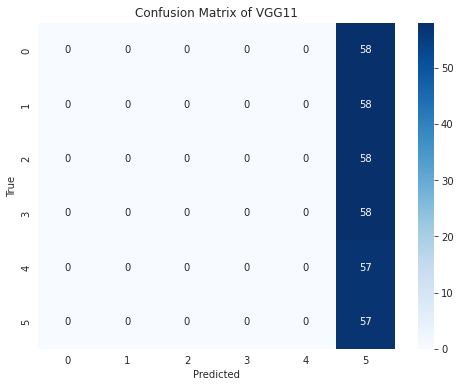

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        57
           5       0.16      1.00      0.28        57

    accuracy                           0.16       346
   macro avg       0.03      0.17      0.05       346
weighted avg       0.03      0.16      0.05       346


/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [18]:
cm11 = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels11)
plt.figure(figsize=(8, 6))
sns.heatmap(cm11, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of VGG11')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels11))

In [19]:
def channel1_VGG_16():
    model = keras.Sequential()
    # Block 1
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same', input_shape=(256, 256, 1)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 3
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(256, (1, 1), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 4
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (1, 1), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 5
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(512, (1, 1), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    model.add(layers.Flatten())
    # model.add(layers.Dense(4096, activation='relu'))
    # model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dense(6, activation='softmax'))

    return model

model16 = channel1_VGG_16()
model16.summary()

Model: "sequential_16"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_128 (Conv2D)         (None, 256, 256, 64)      640       
                                                                 
 conv2d_129 (Conv2D)         (None, 256, 256, 64)      36928     
                                                                 
 max_pooling2d_80 (MaxPoolin  (None, 128, 128, 64)     0         
 g2D)                                                            
                                                                 
 conv2d_130 (Conv2D)         (None, 128, 128, 128)     73856     
                                                                 
 conv2d_131 (Conv2D)         (None, 128, 128, 128)     147584    
                                                                 
 max_pooling2d_81 (MaxPoolin  (None, 64, 64, 128)      0         
 g2D)                                                

In [20]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score

f1_scores16 = []
for iter in range(10):
  model16 = channel1_VGG_16()
  model16.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
  model16.fit(x_train, y_train, epochs=20, batch_size=32)

  predicted_test_prob16 = model16.predict(x_test)
  predicted_test_labels16 = np.argmax(predicted_test_prob16, axis=1)

  # Calculate F1 score and append to the list
  f1 = f1_score(np.argmax(y_test, axis=1), predicted_test_labels16, average='macro')  # Change average as needed
  f1_scores16.append(f1)

  # Optional: Print F1 score for each iteration
  print(f"Iteration {iter+1}: F1 Score = {f1}")

# After all iterations, you can print or analyze all F1 scores
print(f"All F1 Scores: {f1_scores16}")


Epoch 1/20
44/44 [==============================] - 8s 113ms/step - loss: 1.7920 - accuracy: 0.1527
Epoch 2/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7922 - accuracy: 0.1628
Epoch 3/20
44/44 [==============================] - 5s 108ms/step - loss: 1.7919 - accuracy: 0.1548
Epoch 4/20
44/44 [==============================] - 5s 108ms/step - loss: 1.7919 - accuracy: 0.1548
Epoch 5/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7919 - accuracy: 0.1686
Epoch 6/20
44/44 [==============================] - 5s 110ms/step - loss: 1.7919 - accuracy: 0.1664
Epoch 7/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7919 - accuracy: 0.1548
Epoch 8/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7919 - accuracy: 0.1592
Epoch 9/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7919 - accuracy: 0.1643
Epoch 10/20
44/44 [==============================] - 5s 109ms/step - loss: 1.7919 - accuracy: 0.1599

In [21]:
# Assuming f1_scores is your list of F1 scores
f1_mean16 = np.mean(f1_scores16)
f1_std16 = np.std(f1_scores16)

print(f"Mean F1 Score: {f1_mean16}")
print(f"Standard Deviation of F1 Scores: {f1_std16}")

Mean F1 Score: 0.04750059373182976
Standard Deviation of F1 Scores: 0.0003541917467180973


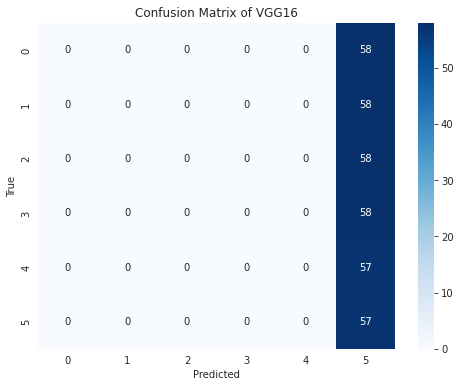

              precision    recall  f1-score   support

           0       0.00      0.00      0.00        58
           1       0.00      0.00      0.00        58
           2       0.00      0.00      0.00        58
           3       0.00      0.00      0.00        58
           4       0.00      0.00      0.00        57
           5       0.16      1.00      0.28        57

    accuracy                           0.16       346
   macro avg       0.03      0.17      0.05       346
weighted avg       0.03      0.16      0.05       346


/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/zhangze6/anaconda3/envs/neuralbody/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

In [22]:
cm16 = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels16)
plt.figure(figsize=(8, 6))
sns.heatmap(cm16, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix of VGG16')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels16))

In [7]:
from tensorflow.keras import layers, models
def vgg_inspired(input_shape, num_classes):
    model = models.Sequential()

    # Block 1
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(layers.Conv2D(32, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Block 2
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(layers.MaxPooling2D((2, 2), strides=(2, 2)))

    # Additional blocks can be added here for deeper models like VGG-16 or VGG-19

    # Flatten and Fully Connected Layers
    model.add(layers.Flatten())
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))
    model.add(layers.Dense(1024, activation='relu'))
    model.add(layers.Dropout(0.5))

    # Output Layer
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

# Create the model
vgg_model = vgg_inspired(input_shape=(256, 256, 1), num_classes=6)
vgg_model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Print the model summary
print(vgg_model.summary())

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 256, 256, 32)      320       
                                                                 
 conv2d_1 (Conv2D)           (None, 256, 256, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2D  (None, 128, 128, 32)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 128, 128, 64)      18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 128, 128, 64)      36928     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 64, 64, 64)       0         
 2D)                                                    

2023-11-20 18:02:18.771757: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 18:02:18.775816: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 18:02:18.776130: I tensorflow/compiler/xla/stream_executor/cuda/cuda_gpu_executor.cc:981] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero
2023-11-20 18:02:18.776660: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorF

11/11 [==============================] - 1s 43ms/step


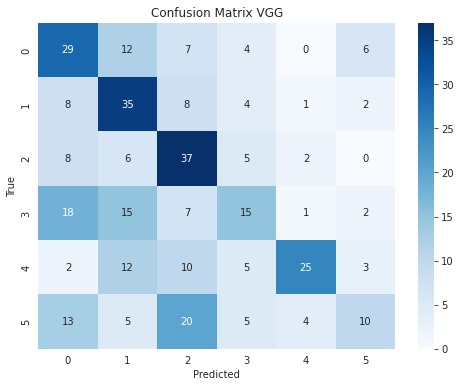

              precision    recall  f1-score   support

           0       0.37      0.50      0.43        58
           1       0.41      0.60      0.49        58
           2       0.42      0.64      0.50        58
           3       0.39      0.26      0.31        58
           4       0.76      0.44      0.56        57
           5       0.43      0.18      0.25        57

    accuracy                           0.44       346
   macro avg       0.46      0.44      0.42       346
weighted avg       0.46      0.44      0.42       346


In [9]:
predicted_vgg_prob = vgg_model.predict(x_test)
predicted_vgg_labels = np.argmax(predicted_vgg_prob, axis=1)

cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_vgg_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix VGG')
plt.show()

print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_vgg_labels))

In [11]:
model = keras.Sequential([
    layers.Input(shape=(256, 256, 1)),  

    layers.Conv2D(32, (11, 11), strides=(2,2), padding = 'same'),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    layers.Conv2D(64, (5, 5), padding = 'same'),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(64, (3, 3), padding = 'same'),
    layers.LeakyReLU(alpha=0.01),
    layers.MaxPooling2D((2, 2)),

    layers.Flatten(),
    
    layers.Dense(128, activation='relu'),
    layers.Dense(6, activation='softmax')
])

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

model.summary()



Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 128, 128, 32)      3904      
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 128, 128, 32)      0         
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 64, 64, 32)       0         
 2D)                                                             
                                                                 
 conv2d_9 (Conv2D)           (None, 64, 64, 64)        51264     
                                                                 
 leaky_re_lu_1 (LeakyReLU)   (None, 64, 64, 64)        0         
                                                                 
 max_pooling2d_6 (MaxPooling  (None, 32, 32, 64)       0         
 2D)                                                  

overfitting?

In [12]:
model.fit(x_train, y_train, epochs=20, batch_size=32) 

Epoch 1/20
44/44 [==============================] - 2s 12ms/step - loss: 0.4330 - accuracy: 0.3162
Epoch 2/20
44/44 [==============================] - 0s 11ms/step - loss: 0.3380 - accuracy: 0.5137
Epoch 3/20
44/44 [==============================] - 0s 11ms/step - loss: 0.2933 - accuracy: 0.5991
Epoch 4/20
44/44 [==============================] - 0s 11ms/step - loss: 0.2335 - accuracy: 0.7004
Epoch 5/20
44/44 [==============================] - 0s 11ms/step - loss: 0.1494 - accuracy: 0.8509
Epoch 6/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0823 - accuracy: 0.9305
Epoch 7/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0391 - accuracy: 0.9768
Epoch 8/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0185 - accuracy: 0.9957
Epoch 9/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0058 - accuracy: 1.0000
Epoch 10/20
44/44 [==============================] - 0s 11ms/step - loss: 0.0012 - accuracy: 1.0000
Epoch 11/

In [13]:
predicted_test_prob = model.predict(x_test)

11/11 [==============================] - 0s 8ms/step


In [14]:
predicted_test_labels = np.argmax(predicted_test_prob, axis=1)

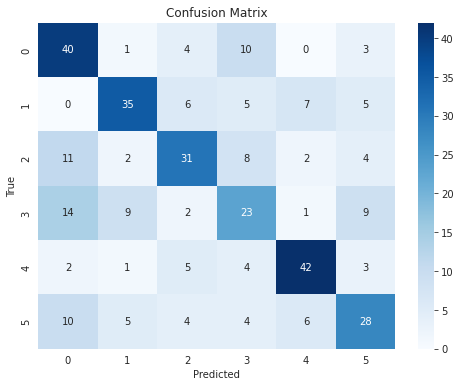

In [15]:
cm = confusion_matrix(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=[0, 1, 2, 3, 4 ,5], yticklabels=[0, 1, 2, 3, 4 ,5])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

In [16]:
print(classification_report(y_true=np.argmax(y_test, axis=1), y_pred=predicted_test_labels))

              precision    recall  f1-score   support

           0       0.52      0.69      0.59        58
           1       0.66      0.60      0.63        58
           2       0.60      0.53      0.56        58
           3       0.43      0.40      0.41        58
           4       0.72      0.74      0.73        57
           5       0.54      0.49      0.51        57

    accuracy                           0.58       346
   macro avg       0.58      0.58      0.57       346
weighted avg       0.58      0.58      0.57       346
